# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set() # Plot styling
from seaborn import heatmap
import math
from tqdm.notebook import tqdm

In [ ]:
def increment(row):
  return row + 1

In [ ]:
def multibly_by_three(row):
  return row * 3

def multibly_by_four(row):
  return row * 4

In [ ]:
def clean_data(data, skip):
  extinct = []
  for i in range(0, len(data), skip):
    found = False
    for k in range(skip):
      if (not found) and (not np.all((data[i+k] > 0))):
        extinct.append(round(i/skip))
        found = True
  return extinct

In [ ]:
def cut_off_start(row, amount):
  return row[amount:]

# Load Data

## Model 0 - three species chain

In [ ]:
print("Loading Model 0...")
data_x0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_0.npy')
data_y0 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_0.npy')
parameters0 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/0.npy')
data_x0 = data_x0.reshape((data_x0.shape[0], data_x0.shape[1], 1))
 
# display
time_frame = np.array(range(0, data_x0.shape[1]))
index = 0
for x in range(4):
  fig = plt.figure(figsize=(23, 3.5))
  for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    plt.plot(time_frame, data_x0[index], label="Top Predator (X)")
    plt.plot(time_frame, data_x0[index+1], label="Consumer (C)")
    plt.plot(time_frame, data_x0[index+2], label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters0[round(index/3)][0], 2)) + ', dc: ' + str(round(parameters0[round(index/3)][1], 2)))
    # plt.ylim(0, 2)
    if i == 1:
      plt.ylabel("Populations")
    index += 36
  plt.show()

  index += 300

print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)
print("parameters0.shape:", parameters0.shape)

side_length = round(math.sqrt(data_x0.shape[0] / 3))
print("side_length", side_length)

print("\nCleaning the data")
extinct = clean_data(data_x0, 3)
print(round(len(extinct)/len(parameters0), 4), "of the populations went extinct for model 0")

extinctions = np.ones((side_length,side_length))
for i in extinct:
  idx1 = math.floor(i/side_length)
  idx2 = i % side_length
  extinctions[idx1][idx2] = 0


min_predator = np.zeros((side_length,side_length))
min_consumer = np.zeros((side_length,side_length))
min_plants = np.zeros((side_length,side_length))
mean_predator = np.zeros((side_length,side_length))
mean_consumer = np.zeros((side_length,side_length))
mean_plants = np.zeros((side_length,side_length))
max_predator = np.zeros((side_length,side_length))
max_consumer = np.zeros((side_length,side_length))
max_plants = np.zeros((side_length,side_length))

for i in tqdm(range(len(parameters0))):
  idx1 = math.floor(i/side_length)
  idx2 = i % side_length
  min_predator[idx1][idx2] = np.min(data_x0[(i*3)])
  min_consumer[idx1][idx2] = np.min(data_x0[(i*3)+1])
  min_plants[idx1][idx2] = np.min(data_x0[(i*3)+2])
  mean_predator[idx1][idx2] = np.mean(data_x0[(i*3)])
  mean_consumer[idx1][idx2] = np.mean(data_x0[(i*3)+1])
  mean_plants[idx1][idx2] = np.mean(data_x0[(i*3)+2])
  max_predator[idx1][idx2] = np.max(data_x0[(i*3)])
  max_consumer[idx1][idx2] = np.max(data_x0[(i*3)+1])
  max_plants[idx1][idx2] = np.max(data_x0[(i*3)+2])

Loading Model 0...


FileNotFoundError: ignored

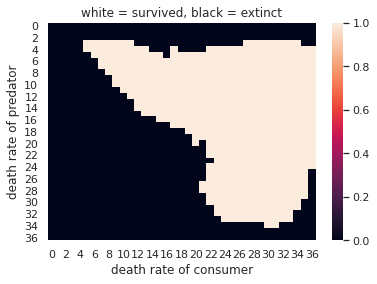

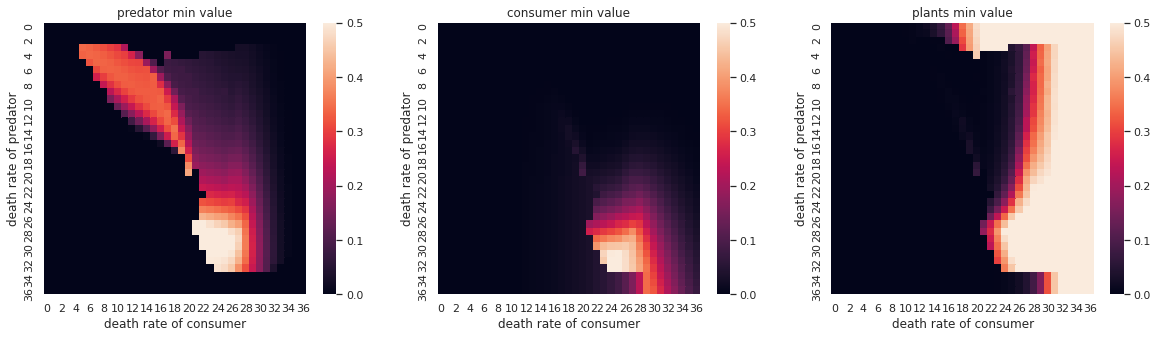

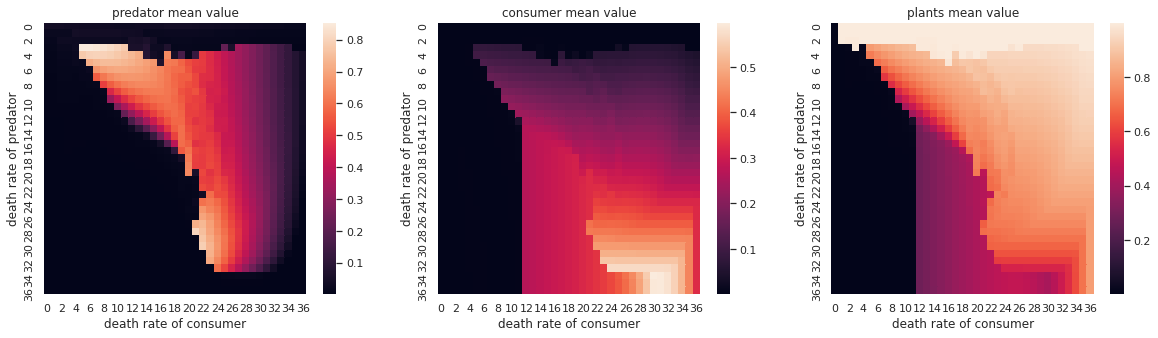

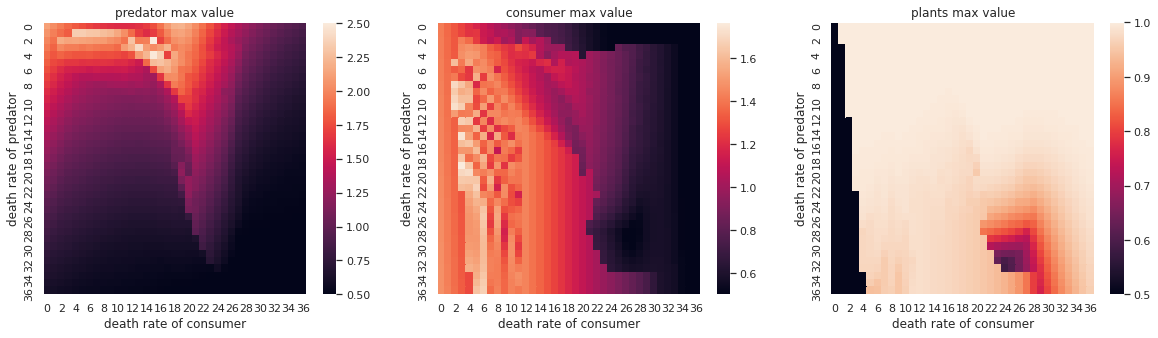

In [ ]:
heatmap(extinctions)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('white = survived, black = extinct')
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
heatmap(min_predator)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('predator min value')

plt.subplot(1, 3, 2)
heatmap(min_consumer)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('consumer min value')

plt.subplot(1, 3, 3)
heatmap(min_plants)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('plants min value')
plt.show()


fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
heatmap(mean_predator)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('predator mean value')

plt.subplot(1, 3, 2)
heatmap(mean_consumer)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('consumer mean value')

plt.subplot(1, 3, 3)
heatmap(mean_plants)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('plants mean value')
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
heatmap(max_predator)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('predator max value')

plt.subplot(1, 3, 2)
heatmap(max_consumer)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('consumer max value')

plt.subplot(1, 3, 3)
heatmap(max_plants)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('plants max value')
plt.show()

In [ ]:
parameters0 = np.delete(parameters0, extinct, axis=0)
extinct1 = np.apply_along_axis(multibly_by_three, 0, extinct)
extinct2 = np.apply_along_axis(increment, 0, extinct1)
extinct3 = np.apply_along_axis(increment, 0, extinct2)
extinct = np.concatenate((extinct1, extinct2, extinct3))
data_x0 = np.delete(data_x0, extinct, axis=0)
data_y0 = np.delete(data_y0, extinct, axis=0)

print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)
print("parameters0.shape:", parameters0.shape)

data_x0.shape: (1842, 3334, 1)
data_y0.shape: (1842,)
parameters0.shape: (614, 2)


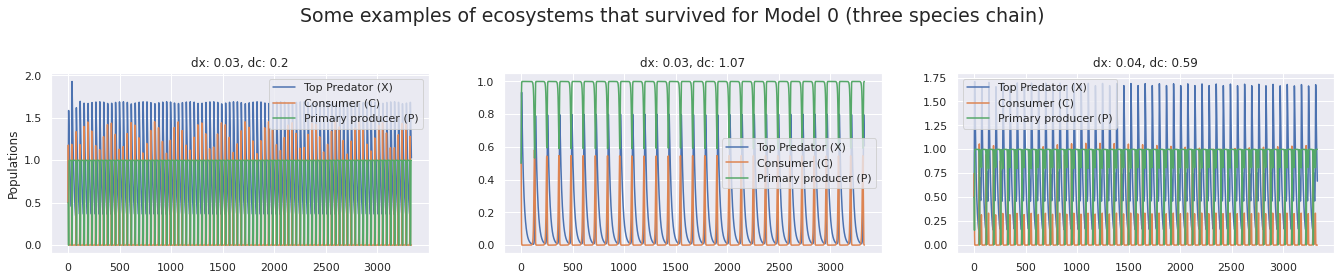

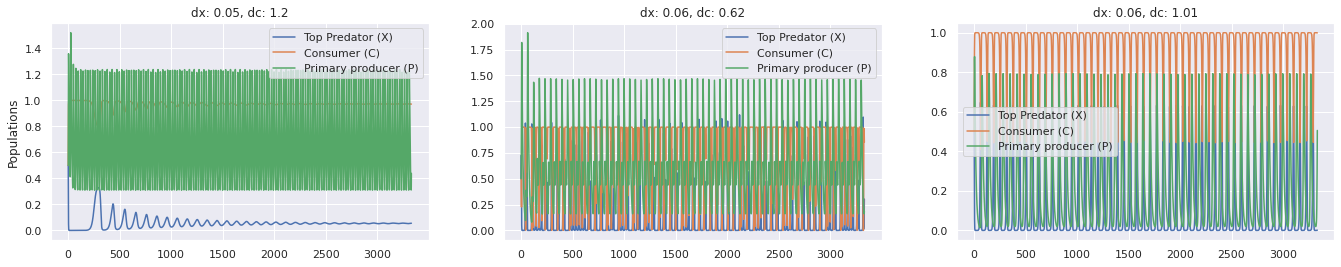

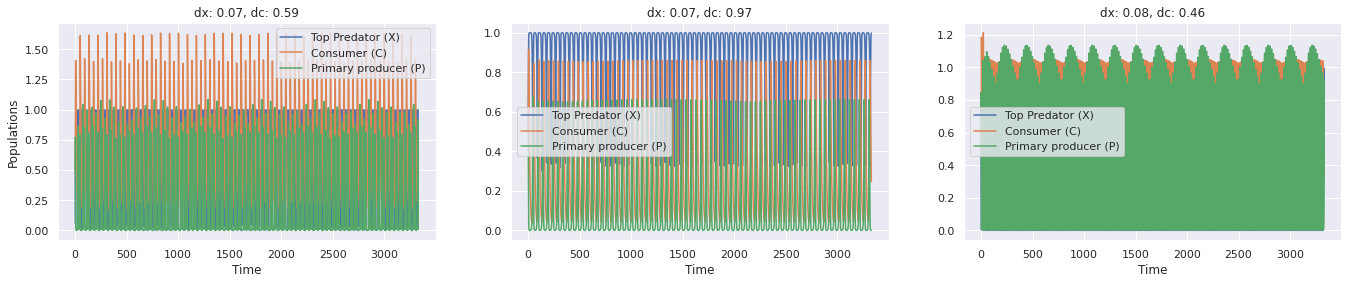

In [ ]:
time_frame = np.array(range(0, data_x0.shape[1]))

index = 0
for x in range(3):
  fig = plt.figure(figsize=(23, 4))
  if x == 0:
    fig.subplots_adjust(top=.75)
  for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    plt.plot(time_frame, data_x0[index], label="Top Predator (X)")
    plt.plot(time_frame, data_x0[index+1], label="Consumer (C)")
    plt.plot(time_frame, data_x0[index+2], label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters0[round(index/3)][0], 2)) + ', dc: ' + str(round(parameters0[round(index/3)][1], 2)))
    # plt.setp(ax.get_xticklabels(), visible=False)
    # plt.ylim(0, 2)
    if i == 1:
      plt.ylabel("Populations")
    if x == 3 - 1:
      plt.xlabel("Time")
    index += 36
  if x == 0:
    plt.suptitle('Some examples of ecosystems that survived for Model 0 (three species chain)', fontsize=19)
  plt.show()

  index += 100

## Model 1 - Tritrophic Omnivory A

Loading Model 1...

data_x1.shape: (4107, 3334, 1)
data_y1.shape: (4107,)
parameters1.shape: (1369, 2)
side_length 37

Cleaning the data
0.61 of the populations went extinct for model 1


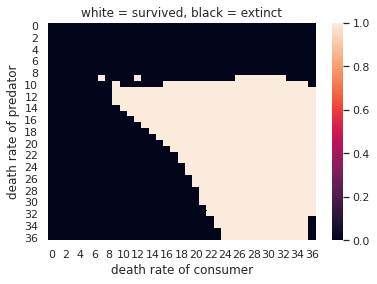


data_x1.shape: (1614, 3334, 1)
data_y1.shape: (1614,)
parameters1.shape: (538, 2)


In [ ]:
print("Loading Model 1...")
data_x1 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_1_new.npy')
data_y1 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_1_new.npy')
parameters1 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/1_new.npy')
data_x1 = data_x1.reshape((data_x1.shape[0], data_x1.shape[1], 1))

print("\ndata_x1.shape:", data_x1.shape)
print("data_y1.shape:", data_y1.shape)
print("parameters1.shape:", parameters1.shape)

side_length = round(math.sqrt(data_x1.shape[0] / 3))
print("side_length", side_length)

print("\nCleaning the data")
extinct = clean_data(data_x1, 3)
print(round(len(extinct)/len(parameters1), 2), "of the populations went extinct for model 1")
parameters1 = np.delete(parameters1, extinct, axis=0)

extinctions = np.ones((side_length,side_length))
for i in extinct:
  idx1 = math.floor(i/side_length)
  idx2 = i % side_length
  extinctions[idx1][idx2] = 0

heatmap(extinctions)
plt.xlabel('death rate of consumer')
plt.ylabel('death rate of predator')
plt.title('white = survived, black = extinct')
plt.show()

extinct1 = np.apply_along_axis(multibly_by_three, 0, extinct)
extinct2 = np.apply_along_axis(increment, 0, extinct1)
extinct3 = np.apply_along_axis(increment, 0, extinct2)
extinct = np.concatenate((extinct1, extinct2, extinct3))
data_x1 = np.delete(data_x1, extinct, axis=0)
data_y1 = np.delete(data_y1, extinct, axis=0)

print("\ndata_x1.shape:", data_x1.shape)
print("data_y1.shape:", data_y1.shape)
print("parameters1.shape:", parameters1.shape)

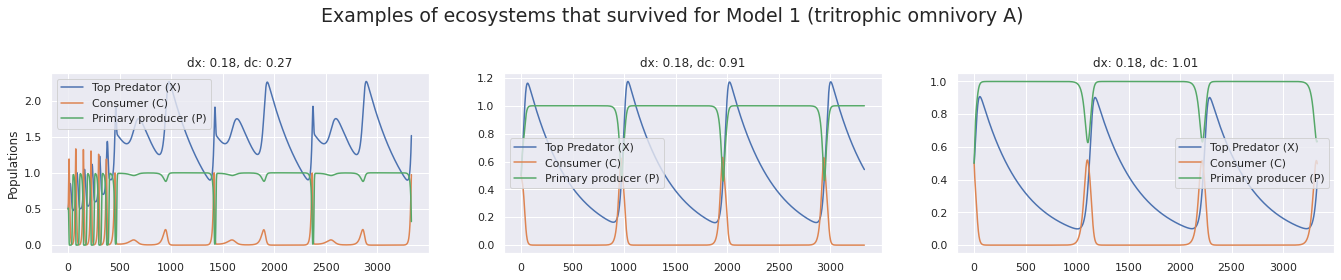

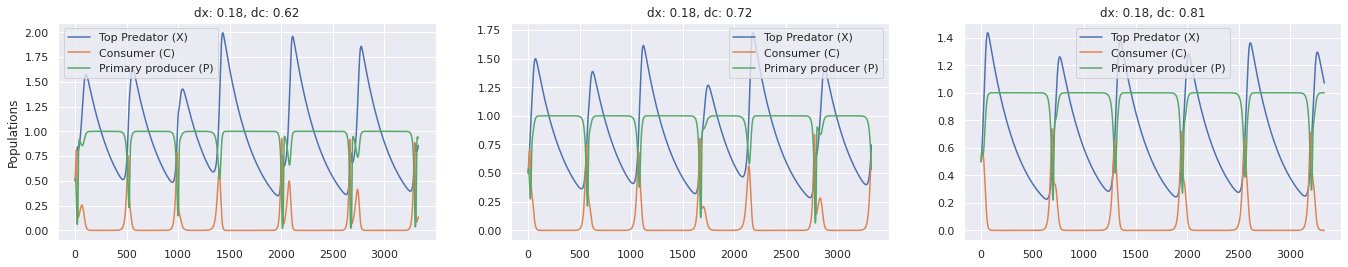

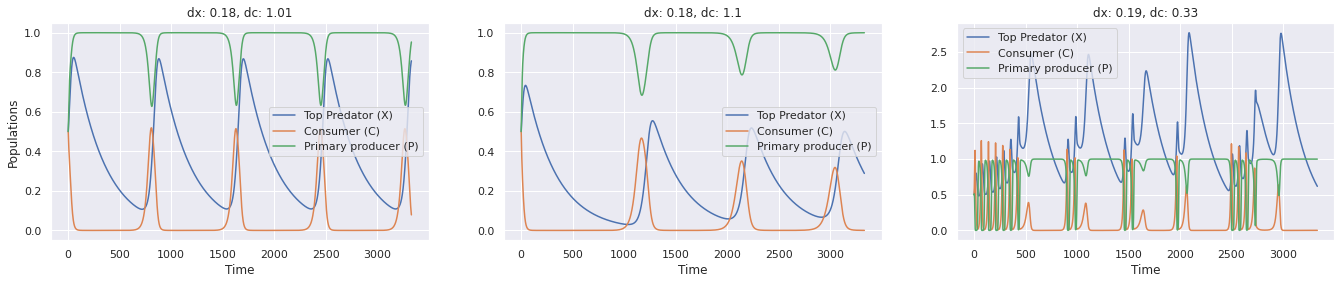

In [ ]:
time_frame = np.array(range(0, data_x1.shape[1]))

index = 0
for x in range(3):
  fig = plt.figure(figsize=(23, 4))
  if x == 0:
    fig.subplots_adjust(top=.75)
  for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    plt.plot(time_frame, data_x1[index], label="Top Predator (X)")
    plt.plot(time_frame, data_x1[index+1], label="Consumer (C)")
    plt.plot(time_frame, data_x1[index+2], label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters1[round(index/3)][0], 2)) + ', dc: ' + str(round(parameters1[round(index/3)][1], 2)))
    # plt.setp(ax.get_xticklabels(), visible=False)
    # plt.ylim(0, 4)
    if i == 1:
      plt.ylabel("Populations")
    if x == 3 - 1:
      plt.xlabel("Time")
    index += 9
  if x == 0:
    plt.suptitle('Examples of ecosystems that survived for Model 1 (tritrophic omnivory A)', fontsize=19)
  plt.show()
  index += 9

## Model 2 - Tritrophic Omnivory B

In [ ]:
print("Loading Model 2...")
data_x2 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_x_2.npy')
data_y2 = np.load('/content/drive/MyDrive/Food-Web-Project/Data/data_y_2.npy')
parameters2 = np.load('/content/drive/MyDrive/Food-Web-Project/Params/2.npy')

print("\ndata_x2.shape:", data_x2.shape)
print("data_y2.shape:", data_y2.shape)
print("parameters2.shape:", parameters2.shape)

Loading Model 2...

data_x2.shape: (8788, 3334)
data_y2.shape: (2197,)
parameters2.shape: (2197, 3)


IndexError: ignored

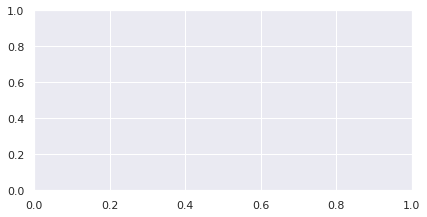

In [ ]:
time_frame = np.array(range(0, data_x2.shape[1]))

index = 0
for x in range(3):
  fig = plt.figure(figsize=(23, 4))
  if x == 0:
    fig.subplots_adjust(top=.75)
  for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    plt.plot(time_frame, data_x2[index], 'r', label="Top Predator (X)")
    plt.plot(time_frame, data_x2[index+2], label="Consumer 1 (C2)")
    plt.plot(time_frame, data_x2[index+3], label="Consumer 2")
    plt.plot(time_frame, data_x2[index+3], 'g', label="Primary producer (P)")
    plt.legend()
    plt.title('dx: ' + str(round(parameters2[round(index/3)][0], 2)) + ', dc1: ' + str(round(parameters2[round(index/3)][1], 2)) + ', dc2: ' + str(round(parameters2[round(index/3)][2], 2)))
    # plt.setp(ax.get_xticklabels(), visible=False)
    # plt.ylim(0, 4)
    if i == 1:
      plt.ylabel("Populations")
    if x == 3 - 1:
      plt.xlabel("Time")
    index += 40
  if x == 0:
    plt.suptitle('Examples of ecosystems that survived for Model 2 (omnivory B)', fontsize=19)
  plt.show()
  index += 120

In [ ]:
# group_x1 = np.delete(data_x2, np.array(range(1, len(data_x2), 4)), 0)
# group_x2 = np.delete(data_x2, np.array(range(2, len(data_x2), 4)), 0)
# group_y1 = np.copy(data_y2)
# group_y2 = np.copy(data_y2)
# group_p1 = np.copy(parameters2)
# group_p2 = np.copy(parameters2)

# print("\ngroup_x1.shape:", group_x1.shape)
# print("group_y1.shape:", group_y1.shape)
# print("group_p1.shape:", group_p1.shape)
# print("group_x2.shape:", group_x2.shape)
# print("group_y2.shape:", group_y2.shape)
# print("group_p2.shape:", group_p2.shape)

# print("\nCleaning group 1")
# extinct = clean_data(group_x1, 3)
# print(round(len(extinct)/len(group_y1), 4), "of the populations went extinct for model 2 subset 1")
# group_p1 = np.delete(group_p1, extinct, axis=0)
# group_y1 = np.delete(group_y1, extinct, axis=0)

# extinct1 = np.apply_along_axis(multibly_by_three, 0, extinct)
# extinct2 = np.apply_along_axis(increment, 0, extinct1)
# extinct3 = np.apply_along_axis(increment, 0, extinct2)
# extinct = np.concatenate((extinct1, extinct2, extinct3))
# group_x1 = np.delete(group_x1, extinct, axis=0)

# print("group_x1.shape:", group_x1.shape)
# print("group_y1.shape:", group_y1.shape)
# print("group_p1.shape:", group_p1.shape)

# print("\nCleaning group 2")
# extinct = clean_data(group_x2, 3)
# print(round(len(extinct)/len(group_y2), 4), "of the populations went extinct for model 2 subset 2")
# group_p2 = np.delete(group_p2, extinct, axis=0)
# group_y2 = np.delete(group_y2, extinct, axis=0)

# extinct1 = np.apply_along_axis(multibly_by_three, 0, extinct)
# extinct2 = np.apply_along_axis(increment, 0, extinct1)
# extinct3 = np.apply_along_axis(increment, 0, extinct2)
# extinct = np.concatenate((extinct1, extinct2, extinct3))
# group_x2 = np.delete(group_x2, extinct, axis=0)

# print("\ngroup_x2.shape:", group_x2.shape)
# print("group_y2.shape:", group_y2.shape)
# print("group_p2.shape:", group_p2.shape)

print("\nCleaning")
extinct = clean_data(data_x2, 4)
print(round(len(extinct)/len(parameters2), 4), "of the populations went extinct for model 2 subset 2")
parameters2 = np.delete(parameters2, extinct, axis=0)
data_y2 = np.delete(data_y2, extinct, axis=0)

extinct1 = np.apply_along_axis(multibly_by_four, 0, extinct)
extinct2 = np.apply_along_axis(increment, 0, extinct1)
extinct3 = np.apply_along_axis(increment, 0, extinct2)
extinct4 = np.apply_along_axis(increment, 0, extinct3)
extinct = np.concatenate((extinct1, extinct2, extinct3, extinct4))
data_x2 = np.delete(data_x2, extinct, axis=0)

print("data_x2.shape:", data_x2.shape)
print("data_y2.shape:", data_y2.shape)
print("parameters2.shape:", parameters2.shape)


# combine two subsets
# data_x2 = np.vstack((group_x1, group_x2))
# data_y2 = np.concatenate((group_y1, group_y2))
# parameters2 = np.vstack((group_p1, group_p2))

data_x2 = data_x2.reshape((data_x2.shape[0], data_x2.shape[1], 1))

# fix shape of y data
data_y2_fix = np.empty((data_x2.shape[0], ))
index = 0
for i in range(len(data_y2)):
  data_y2_fix[index] = 4
  data_y2_fix[index] = 4
  data_y2_fix[index] = 4
  index += 3
data_y2 = data_y2_fix

print("\ndata_x2.shape:", data_x2.shape)
print("data_y2.shape:", data_y2.shape)
print("parameters2.shape:", parameters2.shape)


Cleaning
1.0 of the populations went extinct for model 2 subset 2
data_x2.shape: (0, 3334)
data_y2.shape: (0,)
parameters2.shape: (0, 3)

data_x2.shape: (0, 3334, 1)
data_y2.shape: (0,)
parameters2.shape: (0, 3)


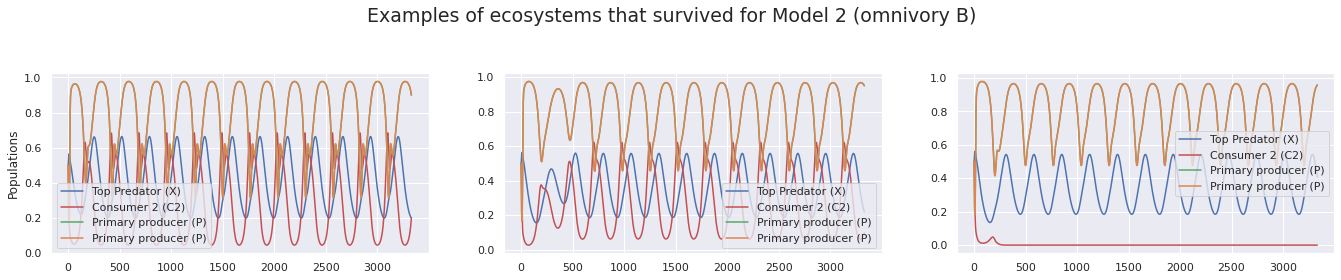

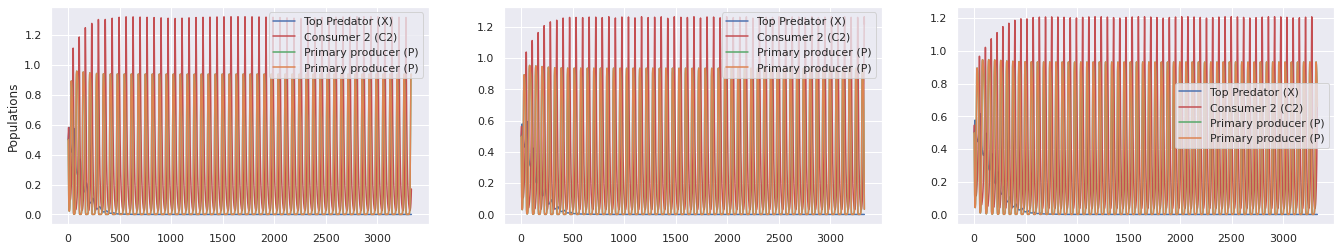

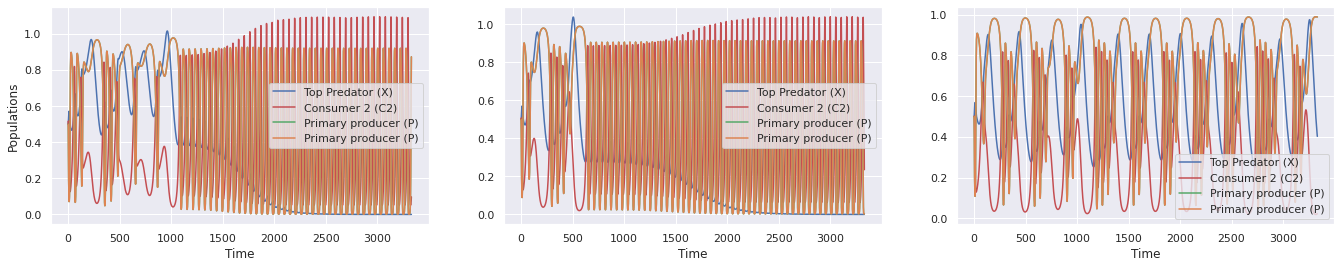

In [ ]:
time_frame = np.array(range(0, data_x2.shape[1]))

index = 0
for x in range(3):
  fig = plt.figure(figsize=(23, 4))
  if x == 0:
    fig.subplots_adjust(top=.75)
  for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    plt.plot(time_frame, data_x2[index], label="Top Predator (X)")
    plt.plot(time_frame, data_x2[index+2], 'r', label="Consumer 2 (C2)")
    plt.plot(time_frame, data_x2[index+3], 'g', label="Primary producer (P)")
    plt.plot(time_frame, data_x2[index+3], label="Primary producer (P)")
    plt.legend()
    # plt.title('dx: ' + str(round(parameters2[round(index/3)][0], 2)) + ', dc1: ' + str(round(parameters2[round(index/3)][1], 2)) + ', dc2: ' + str(round(parameters2[round(index/3)][2], 2)))
    # plt.setp(ax.get_xticklabels(), visible=False)
    # plt.ylim(0, 4)
    if i == 1:
      plt.ylabel("Populations")
    if x == 3 - 1:
      plt.xlabel("Time")
    index += 4
  if x == 0:
    plt.suptitle('Examples of ecosystems that survived for Model 2 (omnivory B)', fontsize=19)
  plt.show()
  index += 4

## Combine all the datasets

In [ ]:
print("data_x0.shape", data_x0.shape)
print("data_y0.shape", data_y0.shape)
print("data_x1.shape", data_x1.shape)
print("data_y1.shape", data_y1.shape)
print("data_x2.shape", data_x2.shape)
print("data_y2.shape", data_y2.shape)

data_x0.shape (1614, 3334, 1)
data_y0.shape (1614,)
data_x1.shape (1614, 3334, 1)
data_y1.shape (1614,)
data_x2.shape (2535, 3334, 1)
data_y2.shape (2535,)


In [ ]:
print("\nreduce data for model 0 so that there is equal data for all classes")
data_x0 = data_x0[:len(data_x1)]
data_y0 = data_y0[:len(data_y1)]
print("data_x0.shape:", data_x0.shape)
print("data_y0.shape:", data_y0.shape)

print("\nreduce data for model 2 so that there is equal data for all classes")
data_x2 = data_x2[:len(data_x1)]
data_y2 = data_y2[:len(data_y1)]
print("data_x2.shape:", data_x2.shape)
print("data_y2.shape:", data_y2.shape)

data_x0_cutoff = np.apply_along_axis(cut_off_start, 1, data_x0, 1000)
data_x1_cutoff = np.apply_along_axis(cut_off_start, 1, data_x1, 1000)
data_x2_cutoff = np.apply_along_axis(cut_off_start, 1, data_x2, 1000)

print("\nCombine data")
data_x = np.vstack((data_x0_cutoff, data_x1_cutoff, data_x2_cutoff))
data_y = np.concatenate((data_y0, data_y1, data_y2))
print("data_x.shape:", data_x.shape)
print("data_y.shape:", data_y.shape)
# data_x = np.vstack((data_x0, data_x1))
# data_y = np.concatenate((data_y0, data_y1))
# print("data_x.shape:", data_x.shape)
# print("data_y.shape:", data_y.shape)


reduce data for model 0 so that there is equal data for all classes
data_x0.shape: (1614, 3334, 1)
data_y0.shape: (1614,)

reduce data for model 2 so that there is equal data for all classes
data_x2.shape: (1614, 3334, 1)
data_y2.shape: (1614,)

Combine data
data_x.shape: (4842, 2334, 1)
data_y.shape: (4842,)


## Prepare data for machine learning

In [ ]:
# target_values = np.unique(data_y)
# print("target_values:", target_values)

print("\nhot encoding... \n")
data_y_encoded = np.zeros((data_x.shape[0], 3))
for i in range(0, data_x0.shape[0]):
  data_y_encoded[i][0] = 1
for i in range(0, data_x1.shape[0]):
  data_y_encoded[i+data_x0.shape[0]][1] = 1
for i in range(0, data_x2.shape[0]):
  data_y_encoded[i+data_x0.shape[0]+data_x1.shape[0]][2] = 1

print("data_y_encoded.shape:", data_y.shape)
print("\nhot encoding looks like: \n", data_y_encoded[0:6])

print("\nSplitting into train and test sets... \n")

X, X_test, Y, Y_test = train_test_split(data_x, data_y_encoded, test_size=0.25)

print("X.shape:", X.shape)
print("X_test.shape:", X_test.shape)
print("Y.shape:", Y.shape)
print("Y_test.shape:", Y_test.shape)


hot encoding... 

data_y_encoded.shape: (4842,)

hot encoding looks like: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Splitting into train and test sets... 

X.shape: (3631, 2334, 1)
X_test.shape: (1211, 2334, 1)
Y.shape: (3631, 3)
Y_test.shape: (1211, 3)


In [ ]:
Y_values = []
for thing in Y_test:
  Y_values.append(np.argmax(thing))
for i in range(3):
  print(Y_values.count(i))

401
395
415


# Define model and train

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout, LSTM
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras

# define the model
model = Sequential()
model.add(Conv1D(128, 2300, padding='same', activation="relu"))
# model.add(LSTM(64, return_sequences=True))

# sanity check for dimensions
print('Shape of the output of first layer: {}'.format(model.predict_on_batch(X[0:32,:,:]).shape))

# model.add(MaxPooling1D(4))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation="softmax"))

sgd = SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X, Y, validation_split=0.3, epochs=50)  # starts training

model.evaluate(X_test, Y_test)
model.summary()

Shape of the output of first layer: (32, 2334, 128)
Epoch 1/50
80/80 [==============================] - 6s 71ms/step - loss: 1.0944 - accuracy: 0.3594 - val_loss: 1.0828 - val_accuracy: 0.4220
Epoch 2/50
80/80 [==============================] - 6s 70ms/step - loss: 1.0743 - accuracy: 0.4444 - val_loss: 1.0749 - val_accuracy: 0.3972
Epoch 3/50
80/80 [==============================] - 6s 70ms/step - loss: 1.0670 - accuracy: 0.4541 - val_loss: 1.0544 - val_accuracy: 0.5138
Epoch 4/50
80/80 [==============================] - 6s 70ms/step - loss: 1.0456 - accuracy: 0.5044 - val_loss: 1.0389 - val_accuracy: 0.5339
Epoch 5/50
80/80 [==============================] - 6s 70ms/step - loss: 1.0350 - accuracy: 0.5046 - val_loss: 1.0130 - val_accuracy: 0.5165
Epoch 6/50
80/80 [==============================] - 6s 70ms/step - loss: 0.9999 - accuracy: 0.5289 - val_loss: 0.9848 - val_accuracy: 0.5413
Epoch 7/50
80/80 [==============================] - 6s 70ms/step - loss: 0.9837 - accuracy: 0.5193 - v

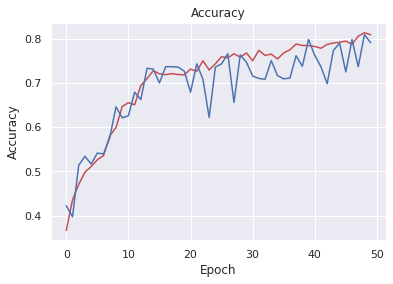

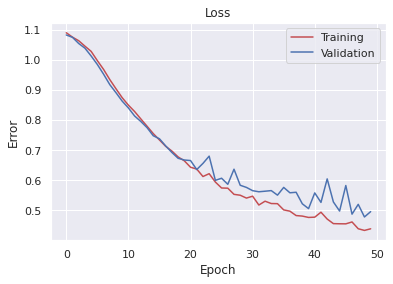

In [ ]:
accuracy = np.array(hist.history['accuracy'])
val_accuracy = np.array(hist.history['val_accuracy'])
error = np.array(hist.history['loss'])

plt.plot(hist.epoch, accuracy, 'r', label="Training")
plt.plot(hist.epoch, val_accuracy, 'b', label="Validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(hist.epoch, error, 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

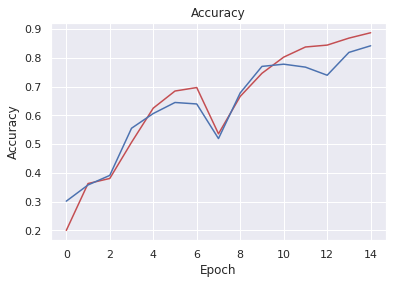

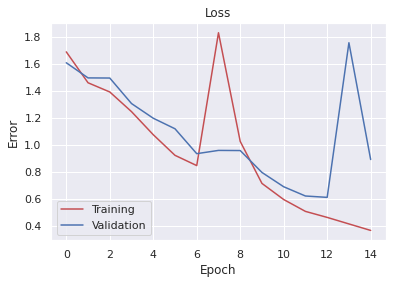

In [ ]:
plt.plot(hist.epoch, accuracy, 'r', label="Training")
plt.plot(hist.epoch, val_accuracy, 'b', label="Validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(hist.epoch, error, 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

# Test

[0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2]
[1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2]

Accuracy:  0.7910817506193228


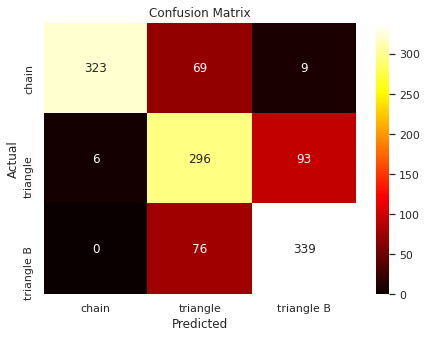

In [ ]:
pred = model.predict(X_test)

predictions = []
actual = []

for thing in pred:
  predictions.append(np.argmax(thing))

for thing in Y_test:
  actual.append(np.argmax(thing))

print(predictions[0:98])

print(actual[0:98])

confusion = [[0 for _ in range(3)] for _ in range(3)]
# print(confusion)
num_correct = 0
total = len(pred)

for i in range(len(pred)):
  confusion[actual[i]][predictions[i]] += 1
  if predictions[i] == actual[i]:
    num_correct += 1

print("\nAccuracy: ", num_correct / total)
# confusion matrix
fig=plt.figure(figsize=(7, 5))
heatmap(confusion, annot=True, fmt="d", cmap="hot", xticklabels=["chain", "triangle", "triangle B"], yticklabels=["chain", "triangle", "triangle B"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

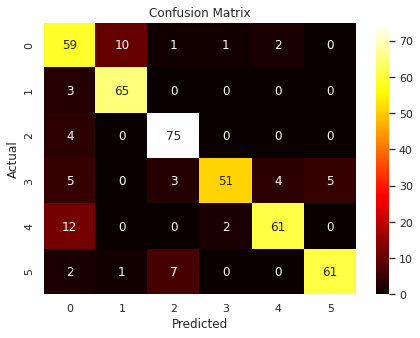

In [ ]:
# confusion matrix
fig=plt.figure(figsize=(7, 5))
heatmap(confusion, annot=True, fmt="d", cmap="hot")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()